In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
def load_dataset(file_path):
    return pd.read_csv(file_path)

In [50]:
def remove_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    outliers = dataframe[((dataframe[column] < q1 - 1.5 * iqr) | (dataframe[column] > q3 + 1.5 * iqr))]
    return dataframe.drop(outliers.index, inplace=False)

In [51]:
def train_linear_regression(dataframe, features, target):
    model = LinearRegression()
    model.fit(dataframe[features], dataframe[target])
    return model

In [52]:
def train_neural_network(dataframe, features, target):
    model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)
    model.fit(dataframe[features], dataframe[target])
    return model

In [53]:
def train_random_forest(dataframe, features, target):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(dataframe[features], dataframe[target])
    return model

In [54]:
def train_kmeans(dataframe, features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dataframe['cluster'] = kmeans.fit_predict(dataframe[features])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataframe[features], dataframe['cluster'])
    
    return kmeans, silhouette_avg

In [55]:
def evaluate_model(model, features, target):
    return model.score(features, target)

In [56]:
def generate_recommendations(model, features):
    return model.predict(features)

In [57]:
df = load_dataset("D:\\Ml project\\Df.csv")
df

,index,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,Rating,ship-country
0,0,2,Standard,Set,S,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,2,IN
1,1,1,Standard,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,5,IN
2,2,2,Expedited,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,2,IN
3,3,2,Standard,Western Dress,L,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,5,IN
4,4,2,Expedited,Top,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,3,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,1,Expedited,Top,XS,Shipped,1,INR,563.00,GURUGRAM,HARYANA,3,IN
296,296,2,Expedited,Western Dress,S,Shipped,1,INR,859.00,VIJAYAWADA,ANDHRA PRADESH,3,IN
297,297,2,Expedited,Set,L,Shipped,1,INR,1133.00,MUMBAI,MAHARASHTRA,3,IN
298,298,2,Expedited,Set,XS,Shipped,1,INR,788.00,NASHIK,MAHARASHTRA,5,IN


In [58]:
df.describe

<bound method NDFrame.describe of      index  Fulfilment ship-service-level       Category Size Courier Status  \
0        0           2           Standard            Set    S      Cancelled   
1        1           1           Standard          kurta  3XL        Shipped   
2        2           2          Expedited          kurta   XL        Shipped   
3        3           2           Standard  Western Dress    L      Cancelled   
4        4           2          Expedited            Top  3XL        Shipped   
..     ...         ...                ...            ...  ...            ...   
295    295           1          Expedited            Top   XS        Shipped   
296    296           2          Expedited  Western Dress    S        Shipped   
297    297           2          Expedited            Set    L        Shipped   
298    298           2          Expedited            Set   XS        Shipped   
299    299           1          Expedited            Set    S        Shipped   

     

In [59]:
df.head()

,index,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,Rating,ship-country
0,0,2,Standard,Set,S,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,2,IN
1,1,1,Standard,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,5,IN
2,2,2,Expedited,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,2,IN
3,3,2,Standard,Western Dress,L,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,5,IN
4,4,2,Expedited,Top,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,3,IN


In [60]:
df.isnull().sum()

index                 0
Fulfilment            0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
Rating                0
ship-country          0
dtype: int64

In [61]:
for column in df.select_dtypes(include='object'):
    print(column, ':', df[column].unique().shape[0])

ship-service-level : 2
Category : 6
Size : 10
Courier Status : 3
currency : 1
ship-city : 138
ship-state : 27
ship-country : 1


In [62]:
df = remove_outliers(df, 'Rating')
linear_model = train_linear_regression(df, ['Amount', 'Qty'], 'Rating')
ann_model = train_neural_network(df, ['Amount', 'Qty'], 'Rating')
rf_model = train_random_forest(df, ['Amount', 'Qty'], 'Rating')


linear_predictions = linear_model.predict(df[['Amount', 'Qty']])
ann_predictions = ann_model.predict(df[['Amount', 'Qty']])
rf_predictions = rf_model.predict(df[['Amount', 'Qty']])

In [63]:
kmeans_model, silhouette_avg = train_kmeans(df, ['Amount', 'Qty'], n_clusters=3)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.6030791420117564


In [64]:
linear_score = evaluate_model(linear_model, df[['Amount', 'Qty']], df['Rating'])
ann_score = evaluate_model(ann_model, df[['Amount', 'Qty']], df['Rating'])
rf_score = evaluate_model(rf_model, df[['Amount', 'Qty']], df['Rating'])
print('Linear regression score:', linear_score)
print('Artificial neural network score:', ann_score)
print('Random Forest score:', rf_score)

Linear regression score: 0.010448536686892496
Artificial neural network score: 0.22666666666666666
Random Forest score: 0.44856575893143913


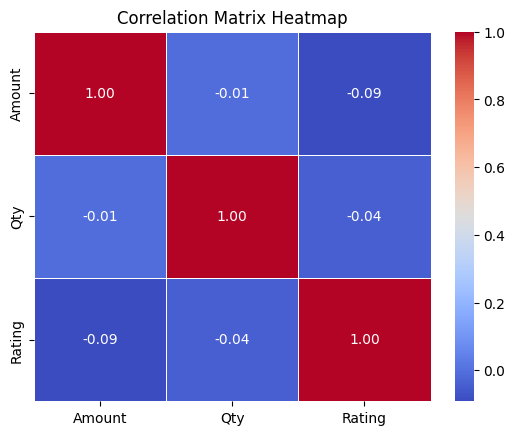

In [65]:
correlation_matrix = df[['Amount', 'Qty', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [66]:
best_model = rf_model
predicted_ratings = generate_recommendations(best_model, df[['Amount', 'Qty']])

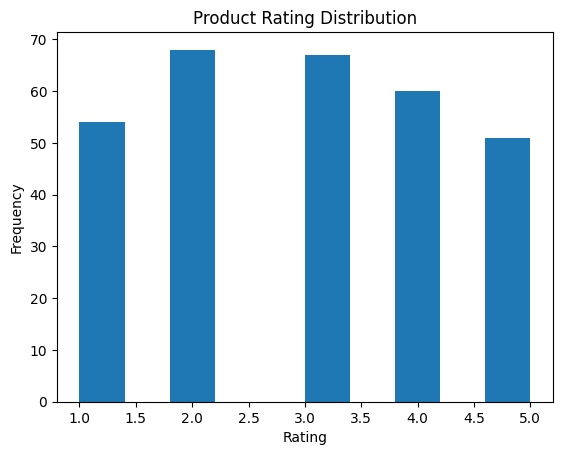

In [67]:
df['predicted_rating'] = predicted_ratings
sorted_df = df.sort_values(by='predicted_rating', ascending=False)
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Product Rating Distribution')
plt.show()

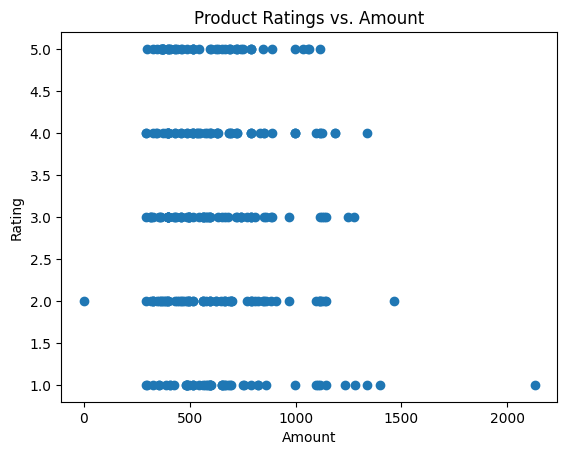

In [68]:
plt.scatter(df['Amount'], df['Rating'])
plt.xlabel('Amount')
plt.ylabel('Rating')
plt.title('Product Ratings vs. Amount')
plt.show()

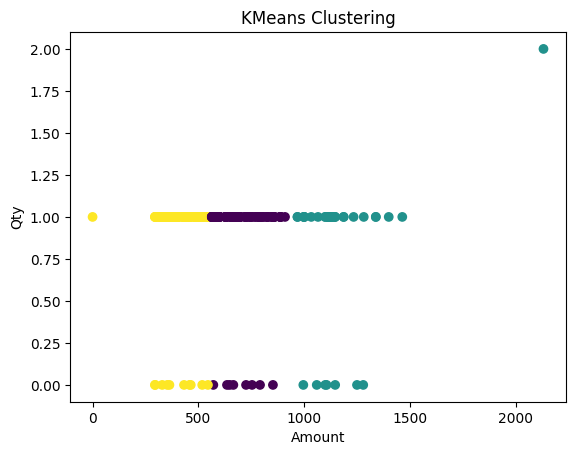

In [69]:
plt.scatter(df['Amount'], df['Qty'], c=df['cluster'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Qty')
plt.title('KMeans Clustering')
plt.show()

In [70]:
print("Sample Recommendations:")
sample_recommendations = sorted_df[['Amount', 'Qty', 'Category','Rating', 'predicted_rating']].head(20)
print(sample_recommendations)

Sample Recommendations:
      Amount  Qty       Category  Rating  predicted_rating
52   1033.00    1            Set       5          4.791000
192   368.00    1          kurta       5          4.760000
38    368.00    1          kurta       5          4.760000
29    725.00    0          kurta       5          4.740440
227  1058.93    0            Set       5          4.700000
270   995.54    0            Set       5          4.633214
264  1065.00    1            Set       5          4.620833
3     753.33    0  Western Dress       5          4.576667
209   375.00    1          kurta       5          4.450500
127   375.00    1          kurta       4          4.450500
222   635.00    1          kurta       5          4.412250
124   635.00    1            Set       4          4.412250
144   690.00    1  Western Dress       5          4.310667
150   376.00    1          kurta       5          4.277143
34    376.00    1          kurta       2          4.277143
22    376.00    1          kurta